In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp

In [2]:
plt.rcParams["figure.figsize"] = (14,4)

In [3]:
def compare_responses(tfs, labels, cutoff=None, whole=False, dB=False, points=2001, axis=None):
    EPS = 1e-20
    
    ax_mg = plt.subplots()[1] if axis is None else axis
    ax_mg.set_ylabel('dB' if dB else 'magnitude', color='C0')
    ax_mg.grid()    
    #'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
    ax_mg.set_prop_cycle('color', ['#1f77b4', '#9467bd', '#7f7f7f', '#17becf']) #plt.cm.viridis(np.linspace(0, .8, len(tfs))))
    ax_ph = ax_mg.twinx()
    ax_ph.set_prop_cycle('color', ['#2ca02c', '#bcbd22', '#17becf']) #plt.cm.summer(np.linspace(0, .5, len(tfs))))
    ax_ph.set_ylabel('phase', color='C2')
    ax_ph.set_yticks(np.pi * np.array([-1, -0.5, 0, 0.5, 1]))
    ax_ph.set_yticklabels(['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'], color='C2')
    plt.xticks(np.pi * np.array([-1, -0.5, 0, 0.5, 1]), ['$-\pi$', '$-\pi/2$', 0, '$\pi/2$', '$\pi$'])
    
    w = np.linspace(-np.pi, np.pi, points)
    for ix, tf in enumerate(tfs):    
        w, H = sp.freqz(*tf, worN=w)
        M = 20 * np.log10(np.abs(np.where(H == 0, EPS, H))) if dB else np.abs(H)
        ax_mg.plot(w, M, lw=2, label=labels[ix])
        ax_ph.plot(w, np.angle(H), alpha=.5, label=labels[ix])
    
    if cutoff is not None:
        ax_mg.axhline(y=-3 if dB else np.sqrt(0.5), linewidth=0.5, color='r')    
        ax_mg.axvline(x=cutoff, linewidth=0.5, color='r');
    ax_mg.legend(loc='upper left')
    ax_ph.legend(loc='upper right')
    ax_mg.axis('tight')
    if dB:
        fs = float(dB)
        fs = fs if fs < 0 else -100
        ax_mg.set_ylim([max(fs, min(M)), None])    
    if not whole:
        plt.xlim(0, np.pi)

We are going to compare lowpass filters with the same order and same cutoff frequency. To fulfill the design requirement each filter's magnitude response must have 6 dB attenuation at the cutoff frequency (i.e. $H(e^{j\omega_c}) = 1/\sqrt{2}$).

In each example the design parameters are tuned to match the remaining characteristics.

### Phase
If we match the stopband attenuations, the phase response of Butterworth filters is the closest to a linear phase response (Chebyshev and elliptic are very similar)

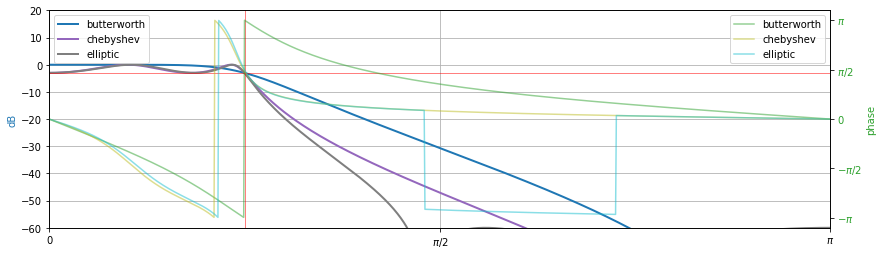

In [4]:
N = 4
cutoff = 0.25

compare_responses([
    sp.butter(N, cutoff), 
    sp.cheby1(N, 3, cutoff), 
    sp.ellip(N, 3, 60, cutoff)
], ['butterworth', 'chebyshev', 'elliptic'], cutoff=np.pi*cutoff, dB=-60)

### Ripples in passband

If we match the stopband attenuations, the ripples in passband are larger for an elliptic filter

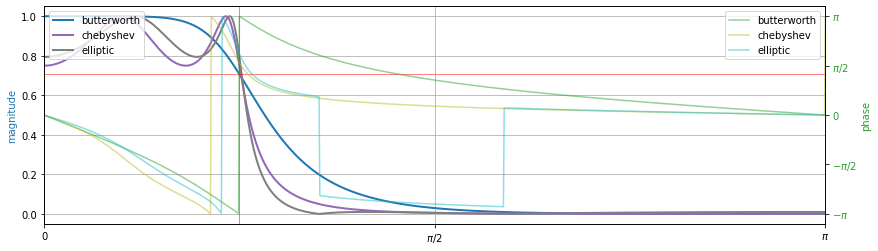

In [6]:
# plotting in linear scale to better see the ripples

compare_responses([
    sp.butter(N, cutoff), 
    sp.cheby1(N, 2.5, cutoff), 
    sp.ellip(N, 2, 40, cutoff)
], ['butterworth', 'chebyshev', 'elliptic'], cutoff=np.pi*cutoff)

### Stopband attenuation

The stopband attenuation for a Butterworth is dependent only the order $N$. For Chebyshev and elliptic with the same equiripple error in passband, we can obtain more attenuation with an elliptic

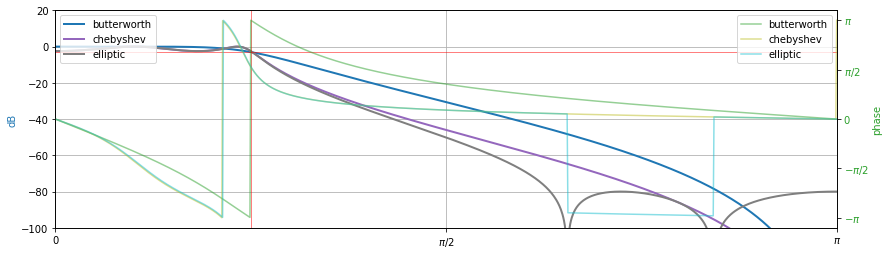

In [7]:
compare_responses([
    sp.butter(N, cutoff), 
    sp.cheby1(N, 2.5, cutoff), 
    sp.ellip(N, 2.5, 80, cutoff)
], ['butterworth', 'chebyshev', 'elliptic'], cutoff=np.pi*cutoff, dB=-100)